In [1]:
sound_filepath = 'outputs/05-JUMP/JU02 - Happy and You Know It/JU02.ogg'
data_filepath = 'outputs/05-JUMP/JU02 - Happy and You Know It/JU02 - Happy and You Know It.ssc'

#sound_filepath = 'outputs/07-INFINITY/INA01 - [Remix] Armakitten 2-X/INA01.ogg'
#data_filepath = 'outputs/07-INFINITY/INA01 - [Remix] Armakitten 2-X/INA01 - [Remix] Armakitten 2-X.ssc'


In [2]:
import numpy as np
from scipy.io.wavfile import read
from scipy.signal import stft
import matplotlib.pyplot as plt
import librosa

In [3]:
from parser import parse_file

In [4]:

y, sr = librosa.load(sound_filepath, duration=None)

data = parse_file(data_filepath)


In [5]:
data['NOTES']

[['00000', '00000', '00000', '00000'],
 ['00000', '00000', '00000', '00000'],
 ['00000', '00000', '00000', '00000'],
 ['00000', '00000', '00000', '00000'],
 ['00000', '00000', '00000', '00000'],
 ['00100', '00000', '00000', '00000'],
 ['00000', '10000', '10000', '00000'],
 ['00000', '00000', '00000', '00000'],
 ['00000', '00001', '00001', '00000'],
 ['00100', '00000', '00000', '00000'],
 ['00001', '00000', '00000', '00000'],
 ['10000', '00000', '00000', '00000'],
 ['00000', '00100', '00100', '00000'],
 ['01000', '00000', '00000', '00000'],
 ['00000', '00010', '00010', '00000'],
 ['00000', '00000', '00000', '00000'],
 ['00000', '01000', '01000', '00000'],
 ['00010', '00000', '00000', '00000'],
 ['01000', '00000', '00000', '00000'],
 ['00100', '00000', '00000', '00000'],
 ['00000', '00100', '00100', '00000'],
 ['00000', '00000', '00000', '00000'],
 ['10000', '00000', '00000', '00000'],
 ['00001', '00000', '00000', '00000'],
 ['10000', '00000', '00000', '00000'],
 ['00100', '00000', '0000

In [6]:
# Detecta el ritmo y los latidos
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(f"Ritmo estimado: {tempo} bpm")
print("Marcos de tiempo de los latidos:", beats)

Ritmo estimado: [129.19921875] bpm
Marcos de tiempo de los latidos: [  63   83  104  124  144  164  184  204  224  245  265  285  305  323
  341  361  381  400  417  436  457  477  497  517  537  558  578  598
  618  638  659  679  699  719  739  759  780  800  820  840  860  880
  901  921  941  961  981 1002 1022 1042 1062 1082 1103 1123 1143 1163
 1183 1203 1224 1244 1264 1284 1305 1325 1345 1365 1385 1405 1426 1446
 1466 1486 1506 1526 1547 1567 1587 1607 1628 1648 1668 1688 1706 1725
 1745 1768 1789 1809 1829 1850 1870 1890 1910 1930 1951 1971 1991 2011
 2031 2051 2072 2092 2112 2132 2152 2172 2193 2213 2233 2253 2274 2294
 2314 2334 2354 2374 2394 2414 2432 2451 2471 2493 2515 2536 2556 2576
 2596 2616 2637 2657 2677 2697 2718 2738 2758 2778 2798 2819 2839 2859
 2879 2899 2920 2940 2960 2980 3000 3021 3041 3061 3081 3101 3121 3142
 3162 3182 3202 3222 3242 3262 3282 3303 3323 3343 3363 3384 3404 3424
 3444 3465 3485 3505 3525 3545 3565 3586 3606 3626 3646 3666 3687 3707
 3727 374

In [7]:
# Convierte marcos de tiempo a segundos
beat_times = librosa.frames_to_time(beats, sr=sr)
print("Tiempos de los latidos en segundos:", beat_times)

Tiempos de los latidos en segundos: [ 1.46285714  1.92725624  2.41487528  2.87927438  3.34367347  3.80807256
  4.27247166  4.73687075  5.20126984  5.68888889  6.15328798  6.61768707
  7.08208617  7.50004535  7.91800454  8.38240363  8.84680272  9.28798186
  9.68272109 10.12390023 10.61151927 11.07591837 11.54031746 12.00471655
 12.46911565 12.95673469 13.42113379 13.88553288 14.34993197 14.81433107
 15.30195011 15.76634921 16.2307483  16.69514739 17.15954649 17.62394558
 18.11156463 18.57596372 19.04036281 19.5047619  19.969161   20.43356009
 20.92117914 21.38557823 21.84997732 22.31437642 22.77877551 23.26639456
 23.73079365 24.19519274 24.65959184 25.12399093 25.61160998 26.07600907
 26.54040816 27.00480726 27.46920635 27.93360544 28.42122449 28.88562358
 29.35002268 29.81442177 30.30204082 30.76643991 31.230839   31.6952381
 32.15963719 32.62403628 33.11165533 33.57605442 34.04045351 34.50485261
 34.9692517  35.43365079 35.92126984 36.38566893 36.85006803 37.31446712
 37.80208617 38.

In [8]:
# un "compas" se define como 4 latidos consecutivos (4/4)
# por lo tanto hay que recorrer de 4 en 4 los latidos
compases = [beats[i:i+4] for i in range(0, len(beats), 4)]
compases

[array([ 63,  83, 104, 124]),
 array([144, 164, 184, 204]),
 array([224, 245, 265, 285]),
 array([305, 323, 341, 361]),
 array([381, 400, 417, 436]),
 array([457, 477, 497, 517]),
 array([537, 558, 578, 598]),
 array([618, 638, 659, 679]),
 array([699, 719, 739, 759]),
 array([780, 800, 820, 840]),
 array([860, 880, 901, 921]),
 array([ 941,  961,  981, 1002]),
 array([1022, 1042, 1062, 1082]),
 array([1103, 1123, 1143, 1163]),
 array([1183, 1203, 1224, 1244]),
 array([1264, 1284, 1305, 1325]),
 array([1345, 1365, 1385, 1405]),
 array([1426, 1446, 1466, 1486]),
 array([1506, 1526, 1547, 1567]),
 array([1587, 1607, 1628, 1648]),
 array([1668, 1688, 1706, 1725]),
 array([1745, 1768, 1789, 1809]),
 array([1829, 1850, 1870, 1890]),
 array([1910, 1930, 1951, 1971]),
 array([1991, 2011, 2031, 2051]),
 array([2072, 2092, 2112, 2132]),
 array([2152, 2172, 2193, 2213]),
 array([2233, 2253, 2274, 2294]),
 array([2314, 2334, 2354, 2374]),
 array([2394, 2414, 2432, 2451]),
 array([2471, 2493, 2515

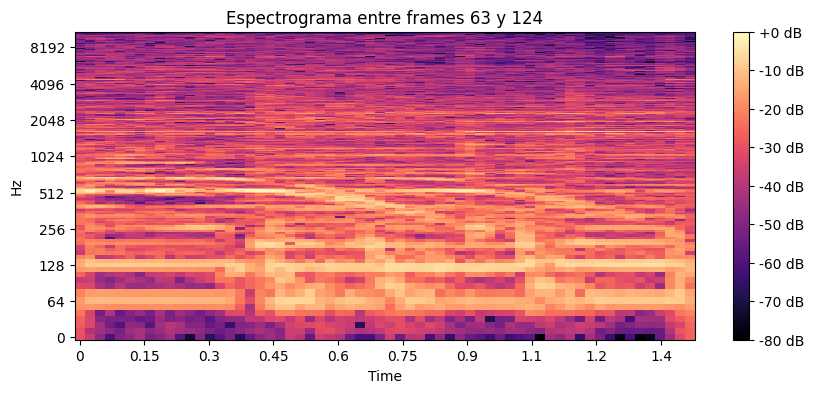

['00000', '00000', '00000', '00000']


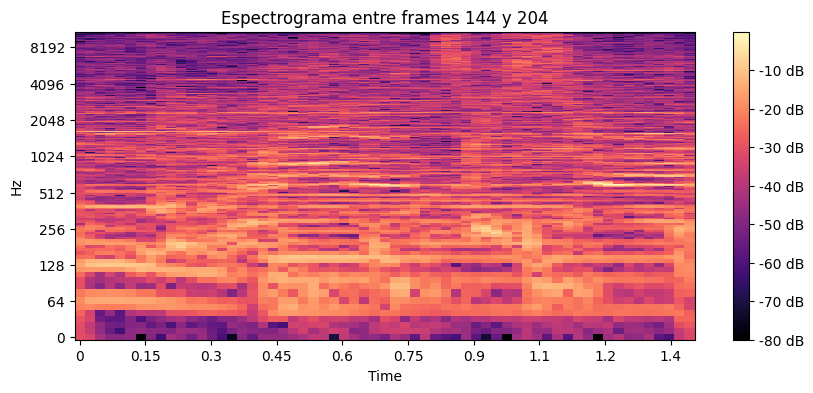

['00000', '00000', '00000', '00000']


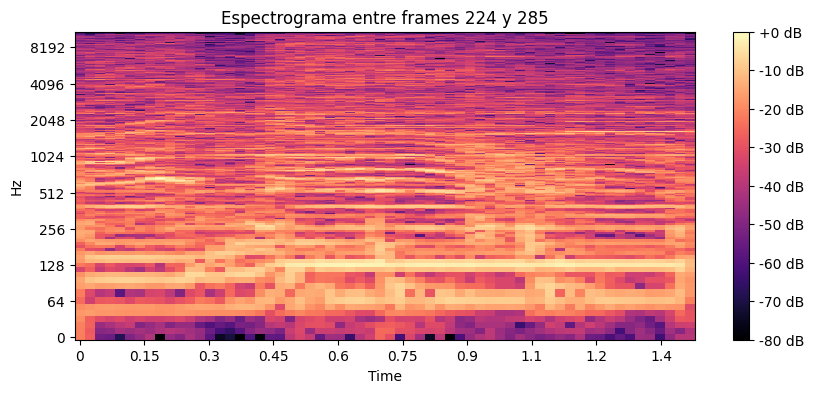

['00000', '00000', '00000', '00000']


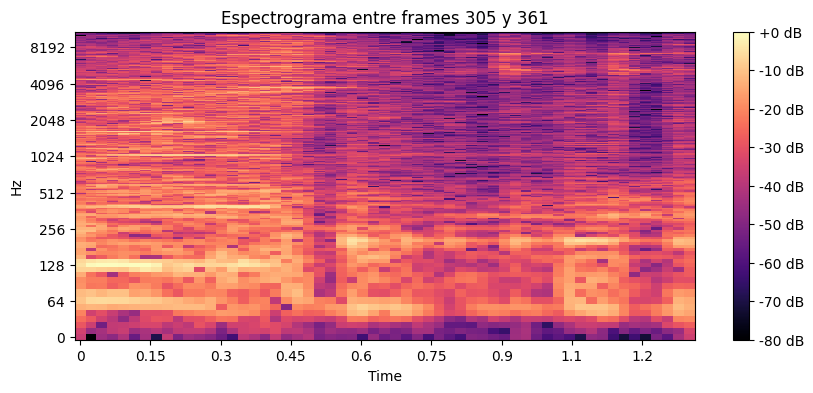

['00000', '00000', '00000', '00000']


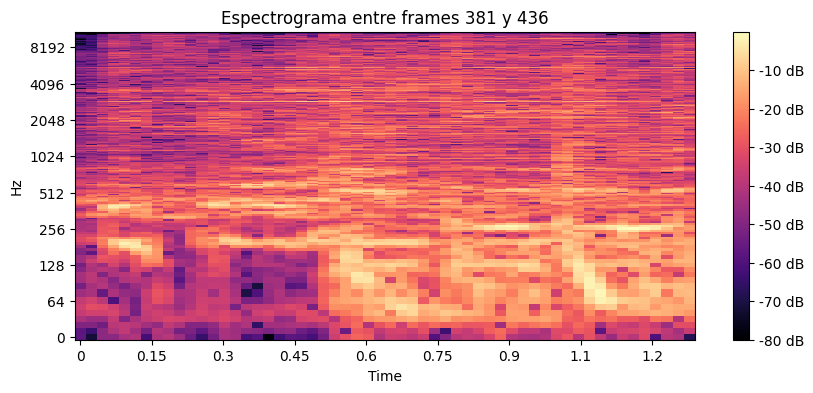

['00000', '00000', '00000', '00000']


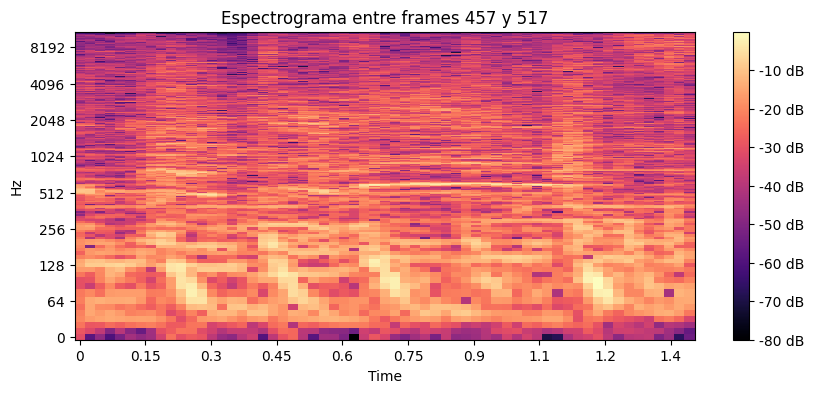

['00100', '00000', '00000', '00000']


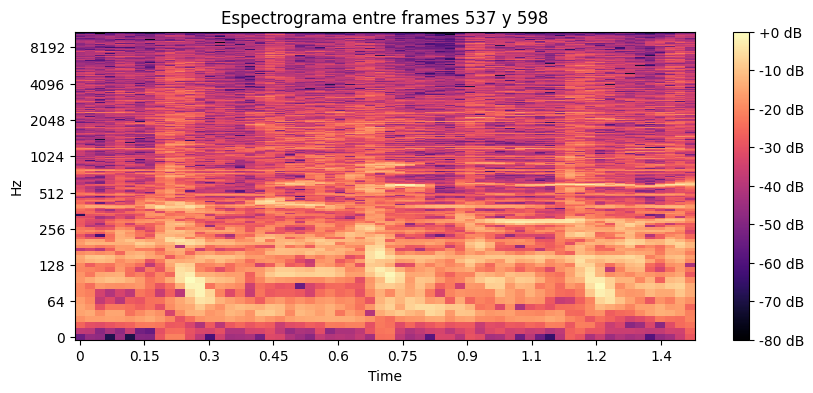

['00000', '10000', '10000', '00000']


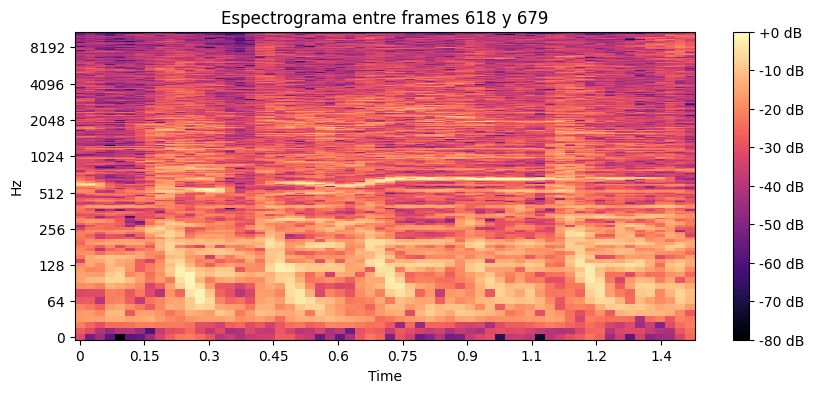

['00000', '00000', '00000', '00000']


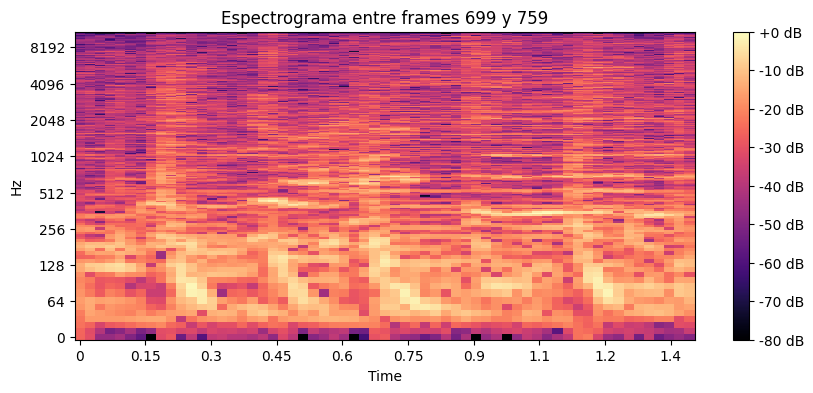

['00000', '00001', '00001', '00000']


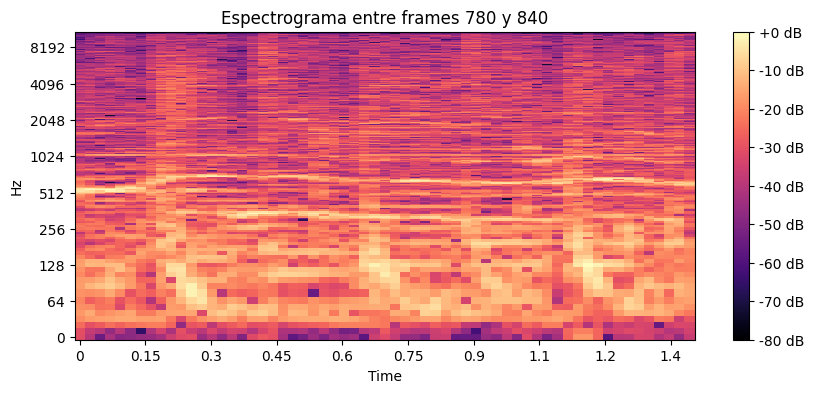

['00100', '00000', '00000', '00000']


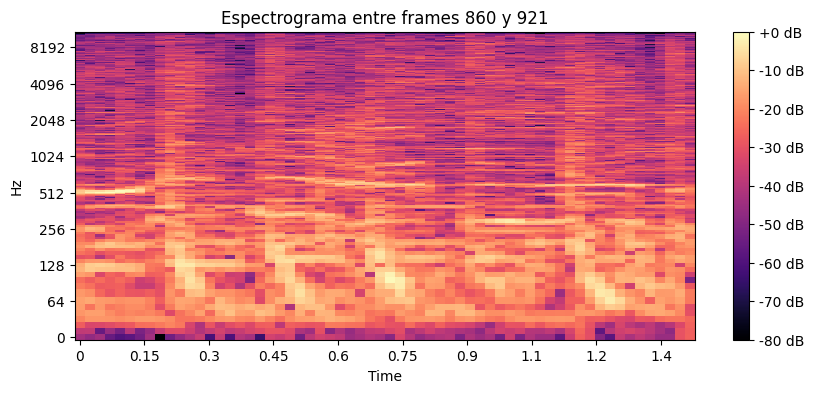

['00001', '00000', '00000', '00000']


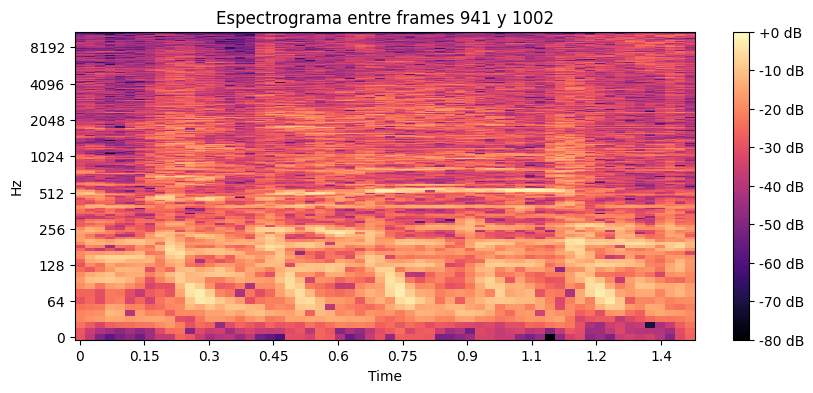

['10000', '00000', '00000', '00000']


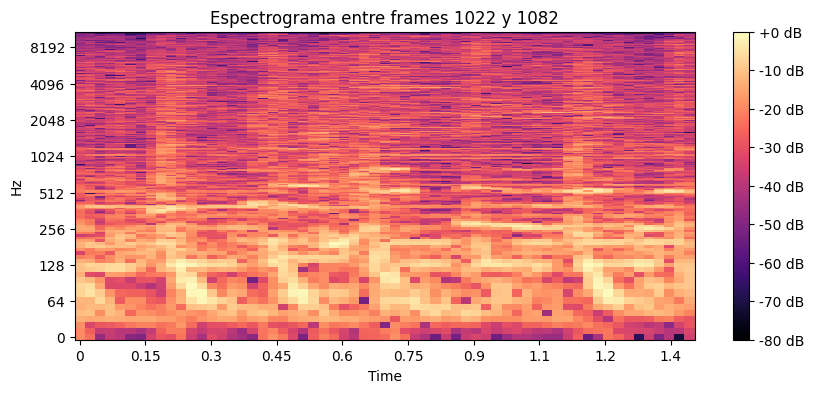

['00000', '00100', '00100', '00000']


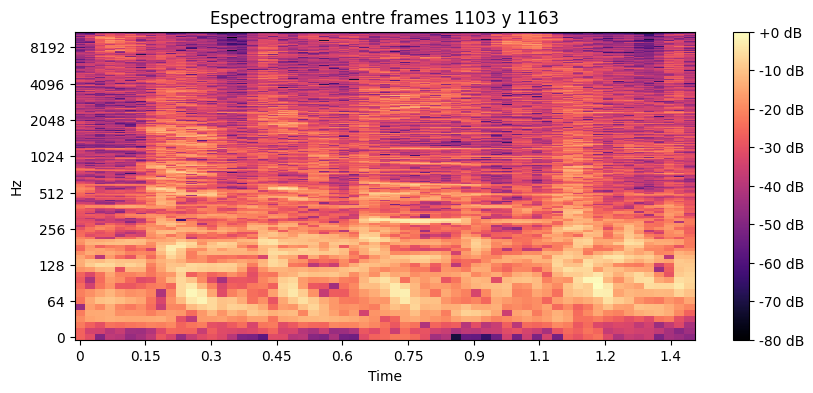

['01000', '00000', '00000', '00000']


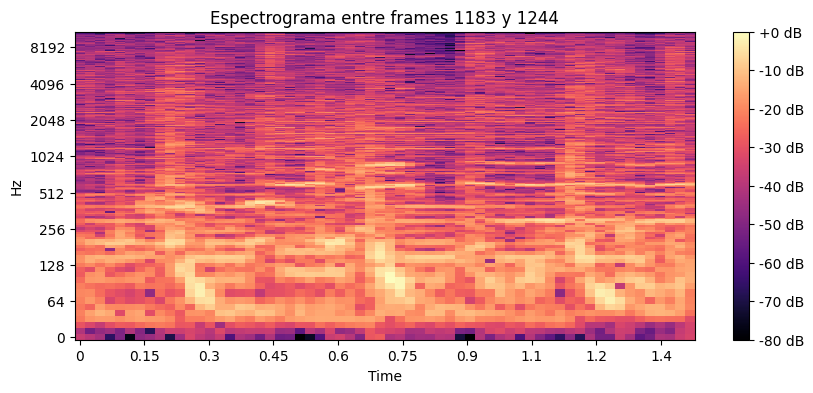

['00000', '00010', '00010', '00000']


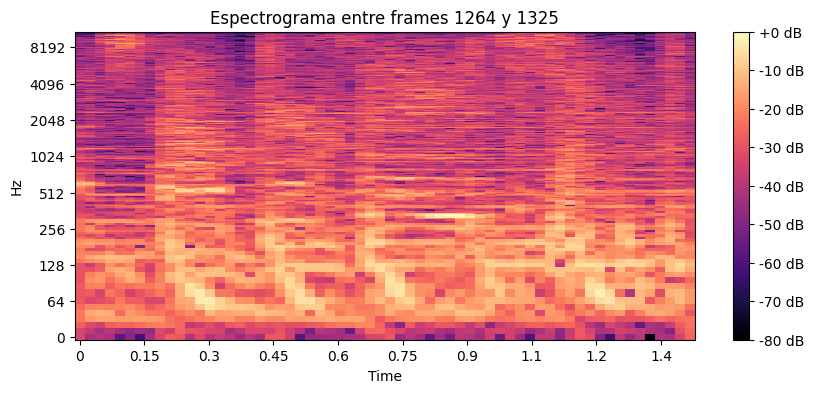

['00000', '00000', '00000', '00000']


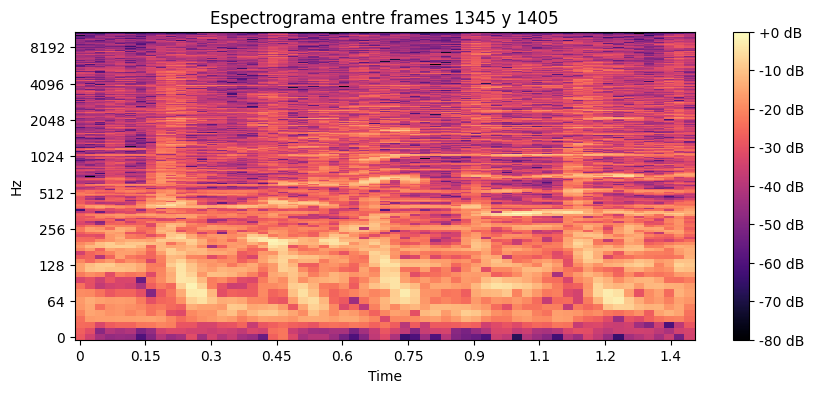

['00000', '01000', '01000', '00000']


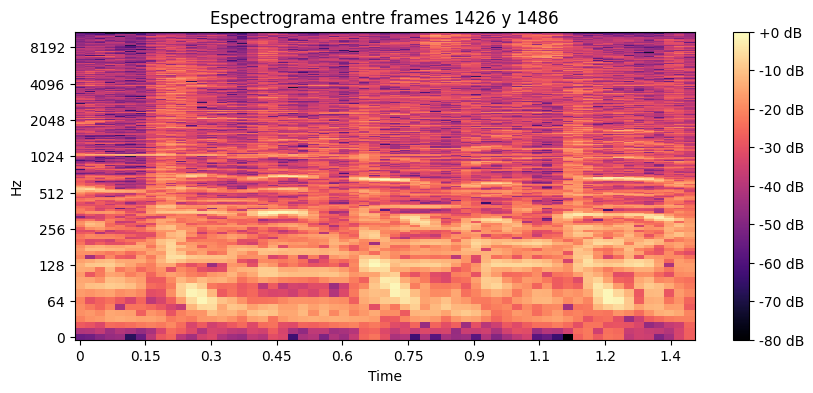

['00010', '00000', '00000', '00000']


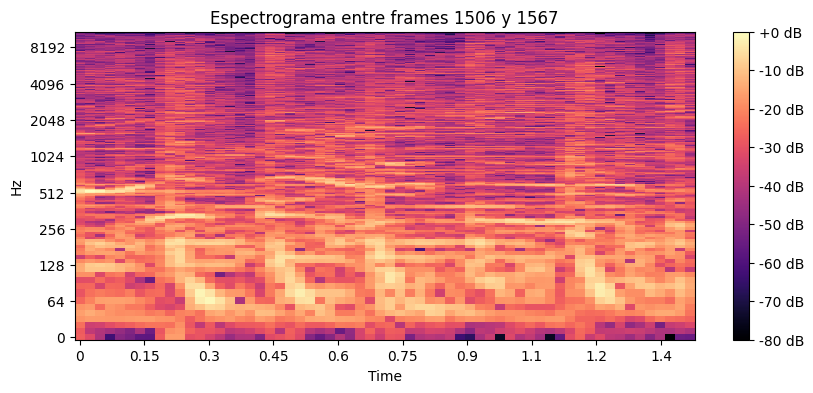

['01000', '00000', '00000', '00000']


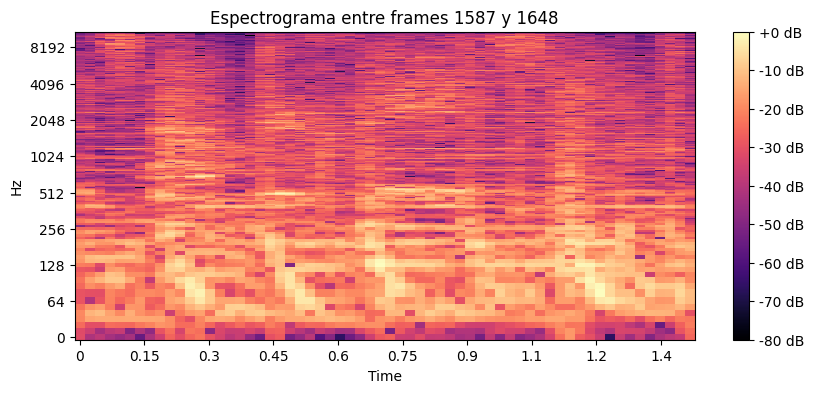

['00100', '00000', '00000', '00000']


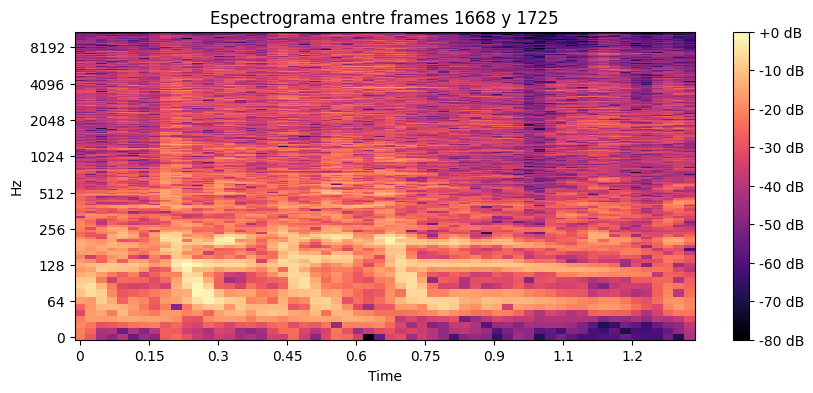

['00000', '00100', '00100', '00000']


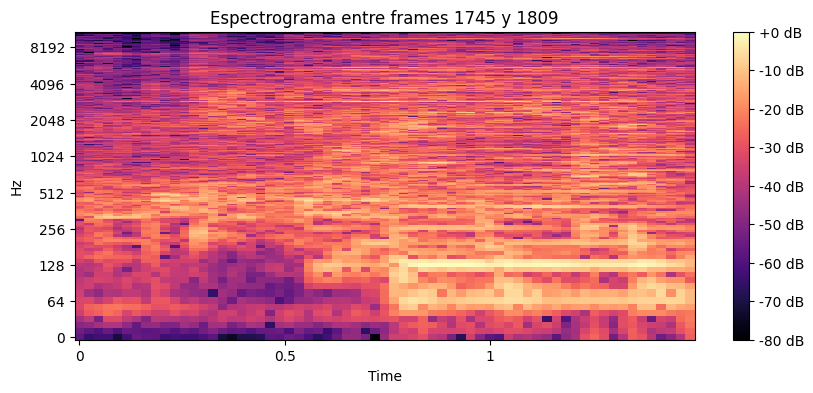

['00000', '00000', '00000', '00000']


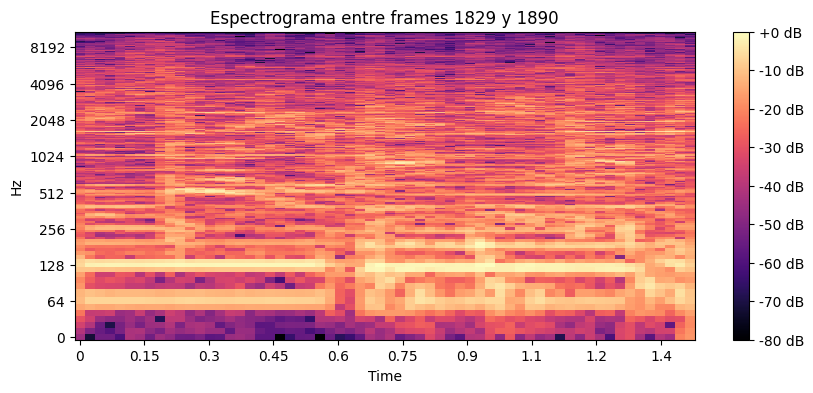

['10000', '00000', '00000', '00000']


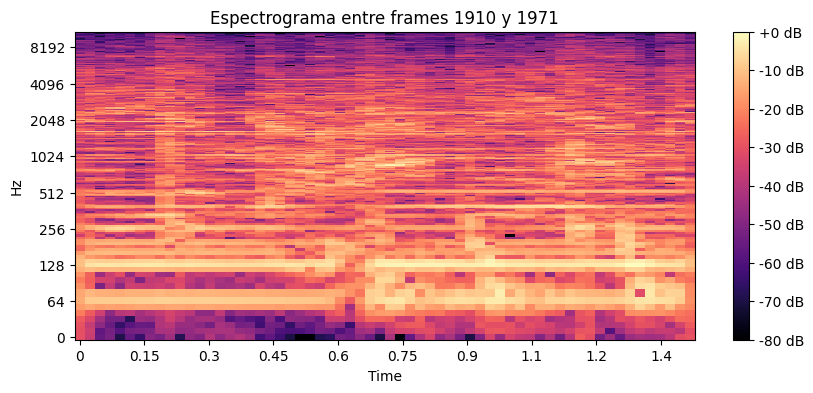

['00001', '00000', '00000', '00000']


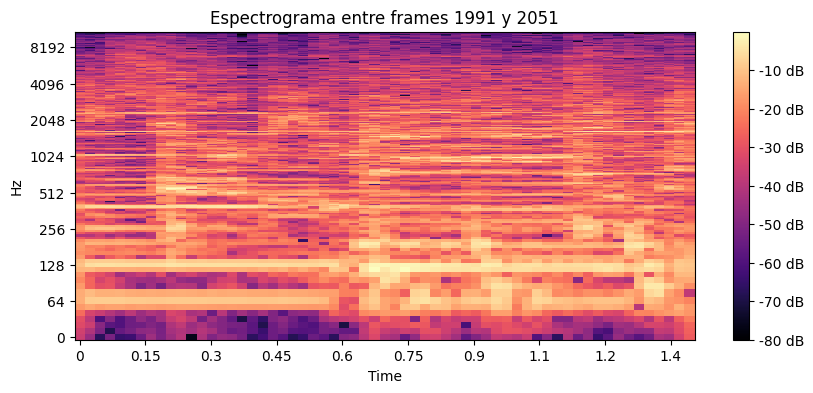

['10000', '00000', '00000', '00000']


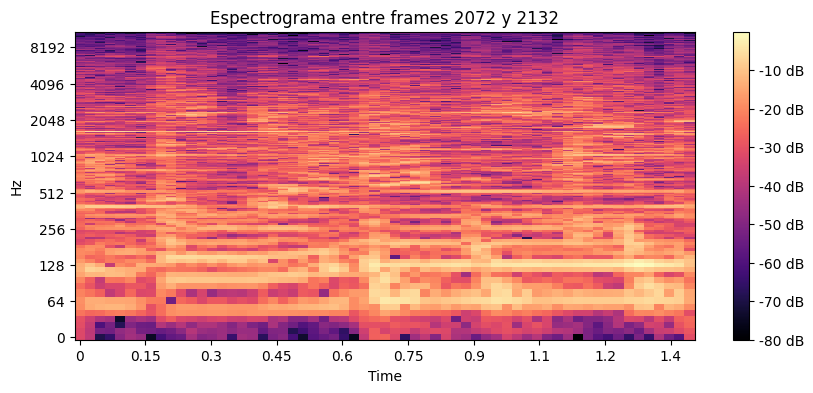

['00100', '00000', '00000', '00000']


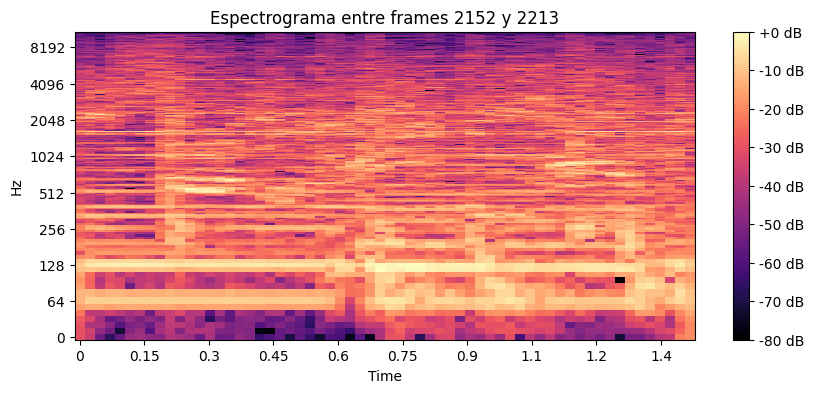

['01000', '00000', '00000', '00000']


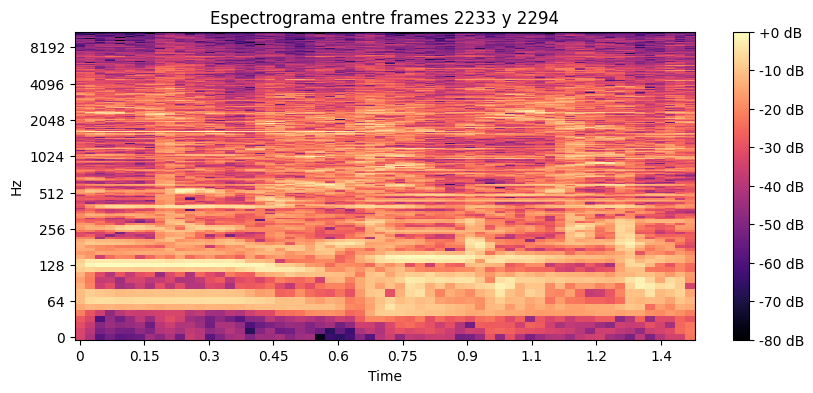

['00010', '00000', '00000', '00000']


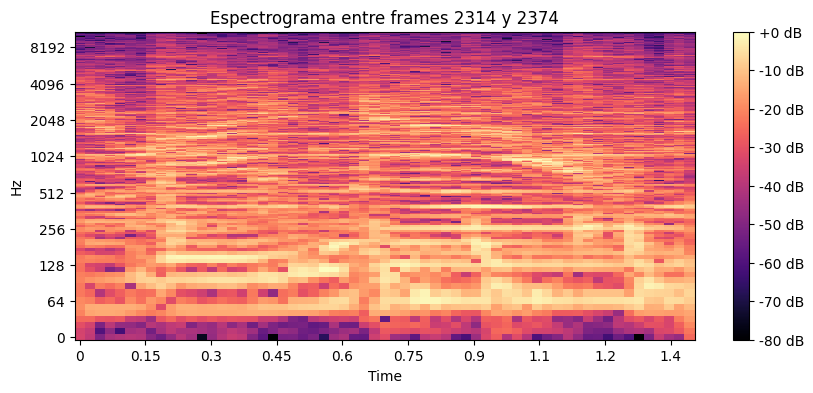

['01000', '00000', '00000', '00000']


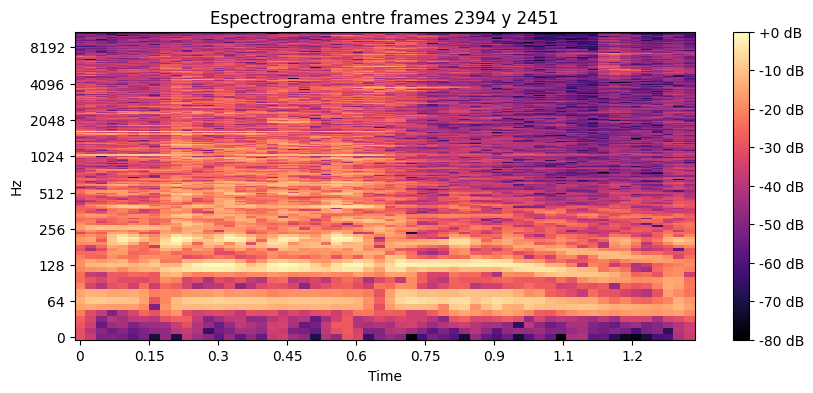

['00100', '00000', '00000', '00000']


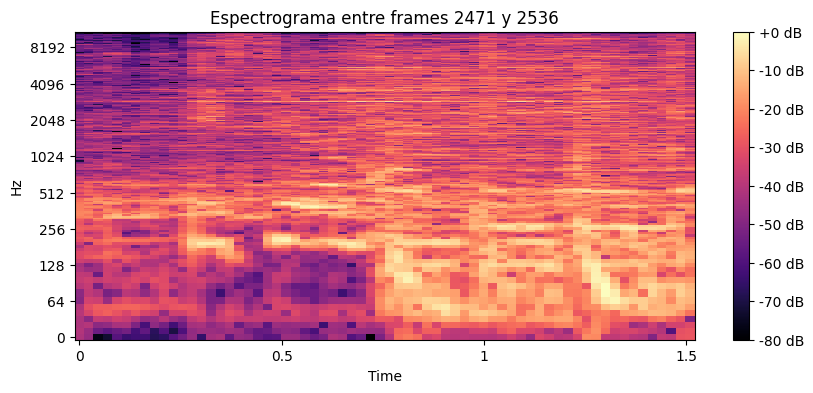

['00000', '00000', '00000', '00000']


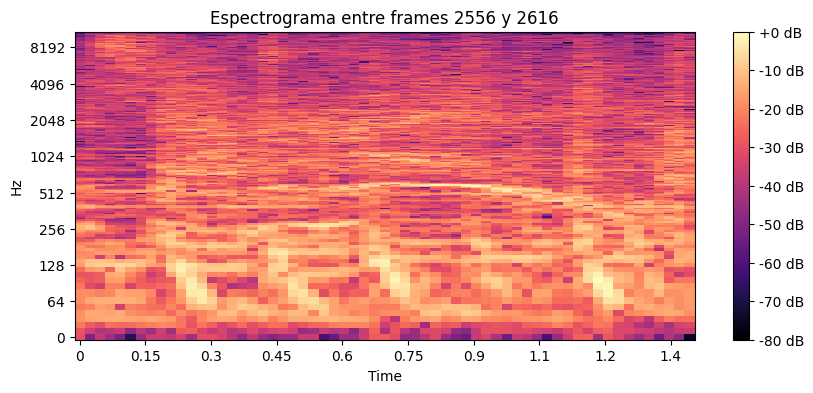

['20000', '00000', '30000', '00000']


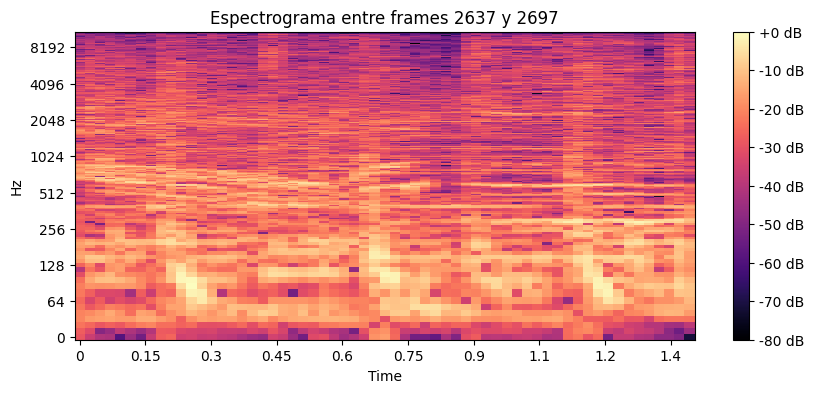

['00000', '00000', '10001', '00000']


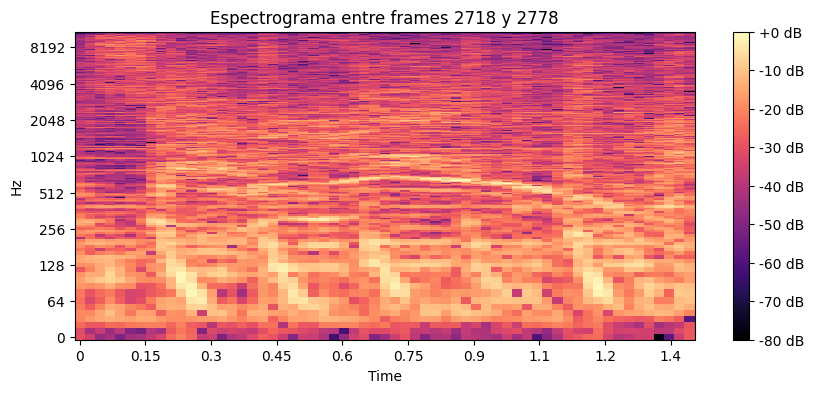

['00002', '00000', '00003', '00000']


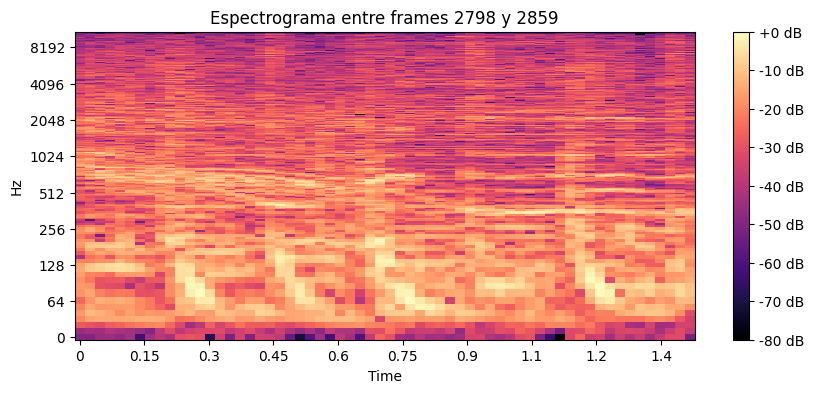

['00000', '00000', '10001', '00000']


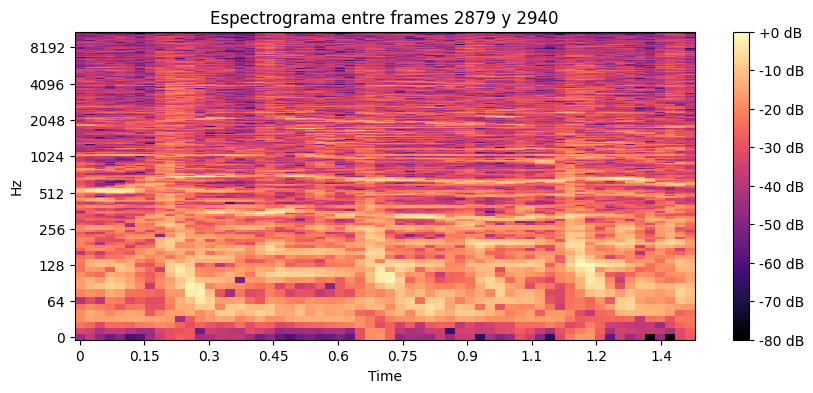

['00001', '00000', '00000', '00000']


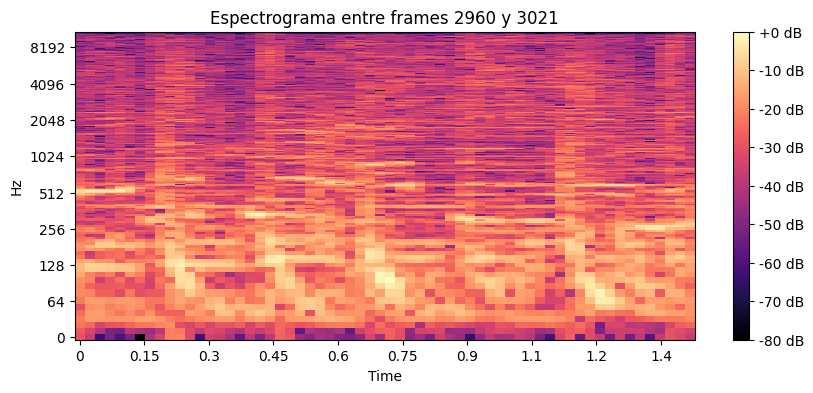

['10000', '00000', '00000', '00000']


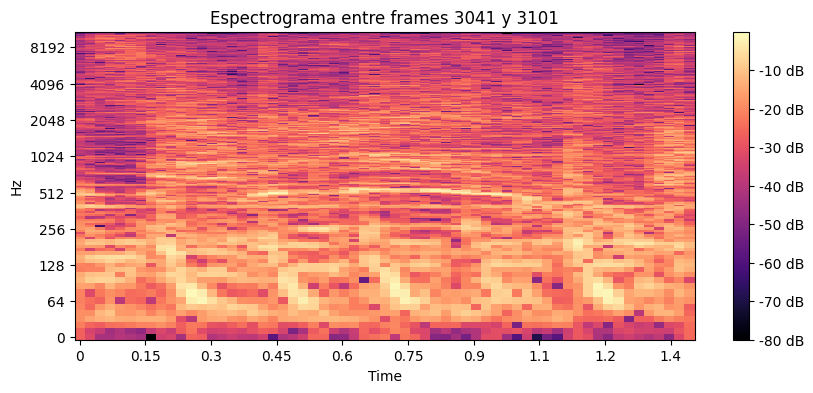

['00100', '00000', '00000', '00000']


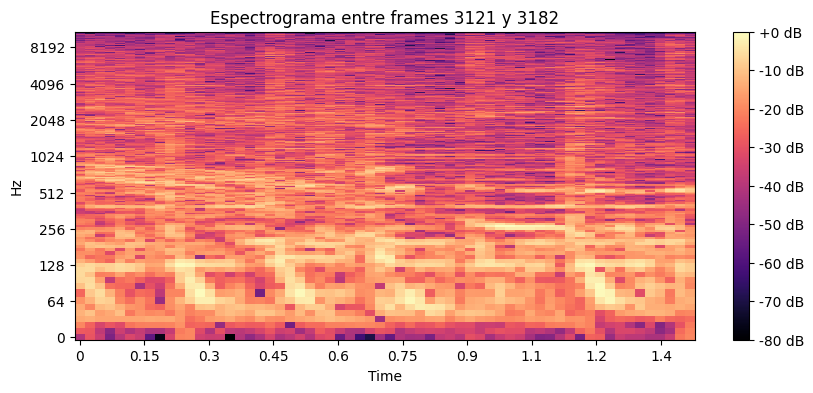

['00000', '00000', '10001', '00000']


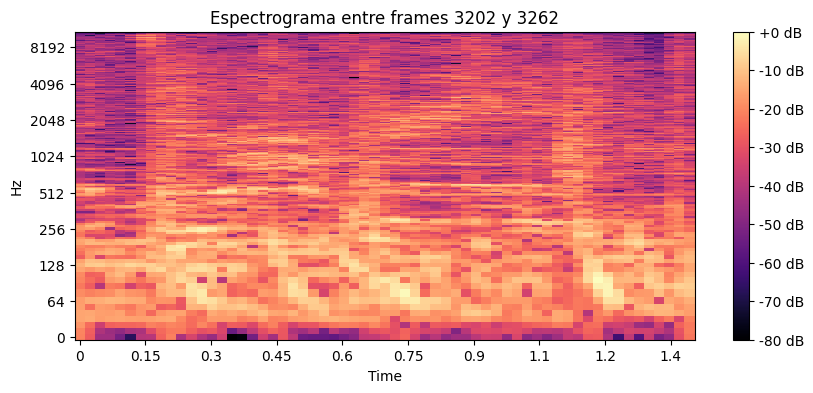

['10000', '00000', '00100', '00000']


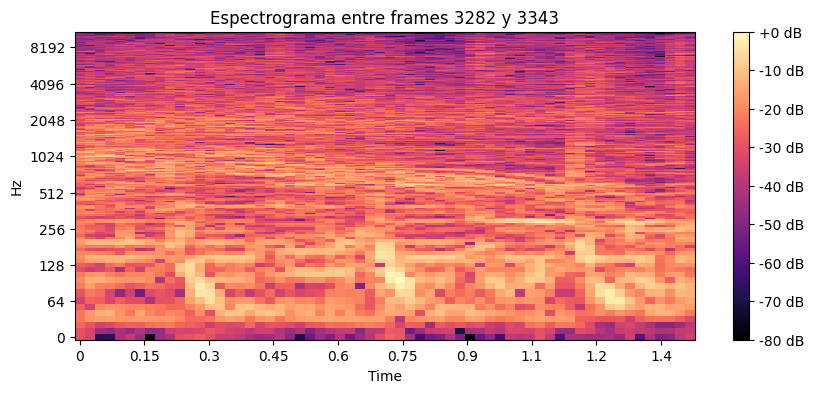

['01000', '00000', '00000', '00000']


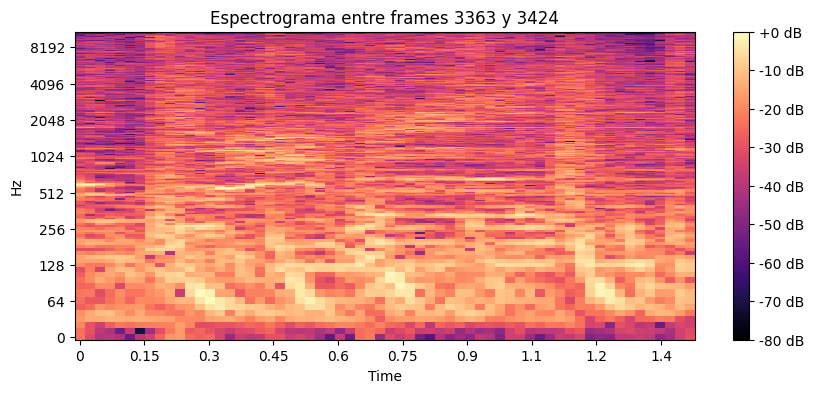

['00010', '00000', '01000', '00000']


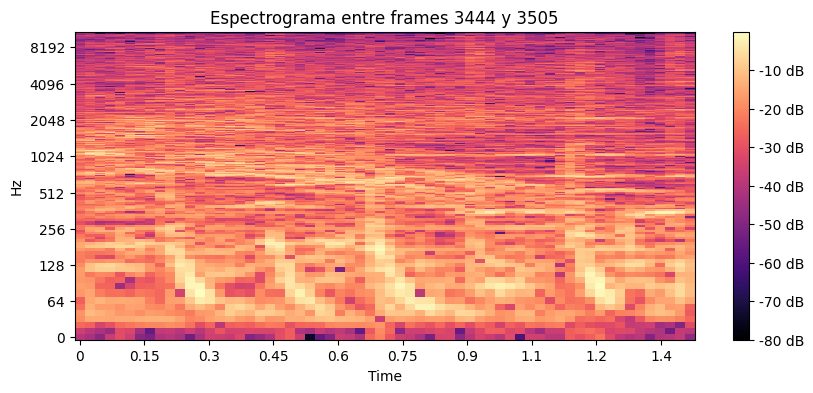

['00010', '00000', '00000', '00000']


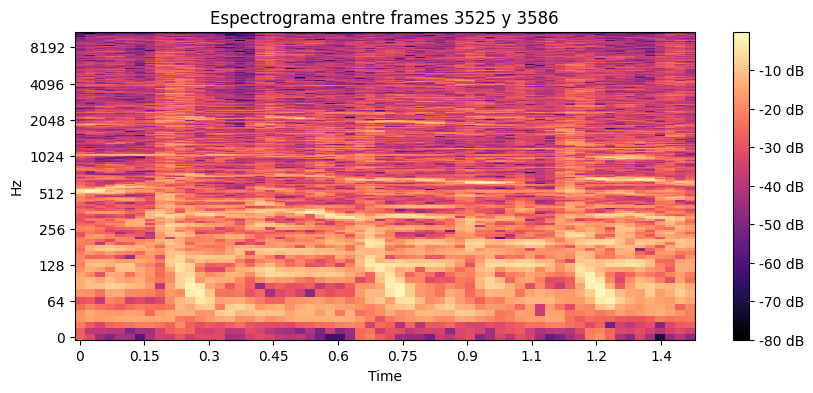

['01010', '00000', '00000', '00000']


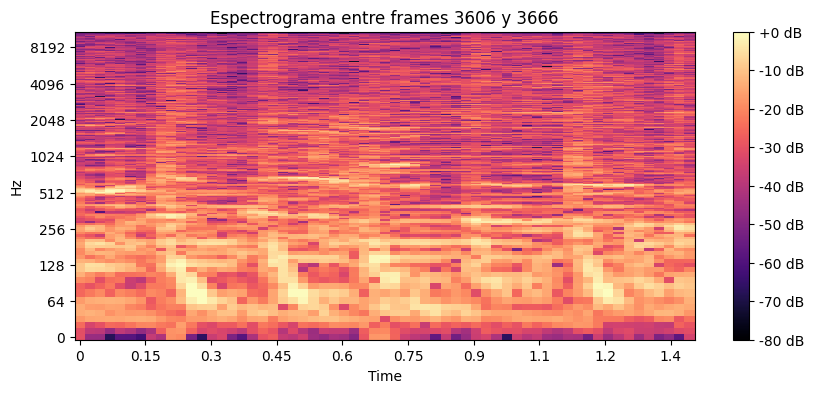

['00100', '00000', '00000', '00000']


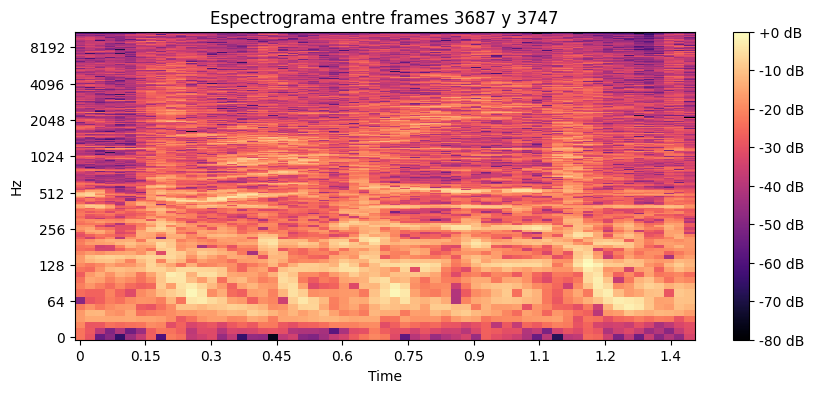

['00001', '00000', '10000', '00000']


In [33]:
# Dibujar el espectrograma para los primeros 5 compases
i = -1
for compas in compases:
    i += 1
    if len(compas) == 4:
        frame1, frame2, frame3, frame4 = compas
        # Convertir los frames a muestras
        start_sample = librosa.frames_to_samples(frame1)
        end_sample = librosa.frames_to_samples(frame4)

        # Obtener el segmento de audio correspondiente a los frames
        y_segment = y[start_sample:end_sample]

        # Calcular un tamaño de ventana adecuado
        n_fft = min(len(y_segment), 2048)

        # Aplicar la STFT al segmento de audio con el tamaño de ventana ajustado
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y_segment, n_fft=n_fft)), ref=np.max)

        # Dibujar el espectrograma
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Espectrograma entre frames {frame1} y {frame4}')
        plt.show()

        # Imprimir las notas
        print(data.get('NOTES')[i])
    

### test

In [10]:
primer_beat_time = beat_times[0]
bpm = tempo[0]
min_tempo = 60 / bpm

In [11]:
bpm, min_tempo, primer_beat_time

(129.19921875, 0.46439909297052157, 1.4628571428571429)

In [12]:
# Calculate the difference between consecutive tempo values
tempo_diff = np.diff(tempo)

# Print the tempo differences
print("Tempo Differences:", tempo_diff)

Tempo Differences: []


In [13]:
# PROBANDO tiempo dinamico
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo_dinamico = librosa.feature.rhythm.tempo(onset_envelope=onset_env, sr=sr, aggregate=None)
print(f"Tempo dinámico estimado: {tempo_dinamico}")

Tempo dinámico estimado: [129.19921875 129.19921875 129.19921875 ... 129.19921875 129.19921875
 129.19921875]


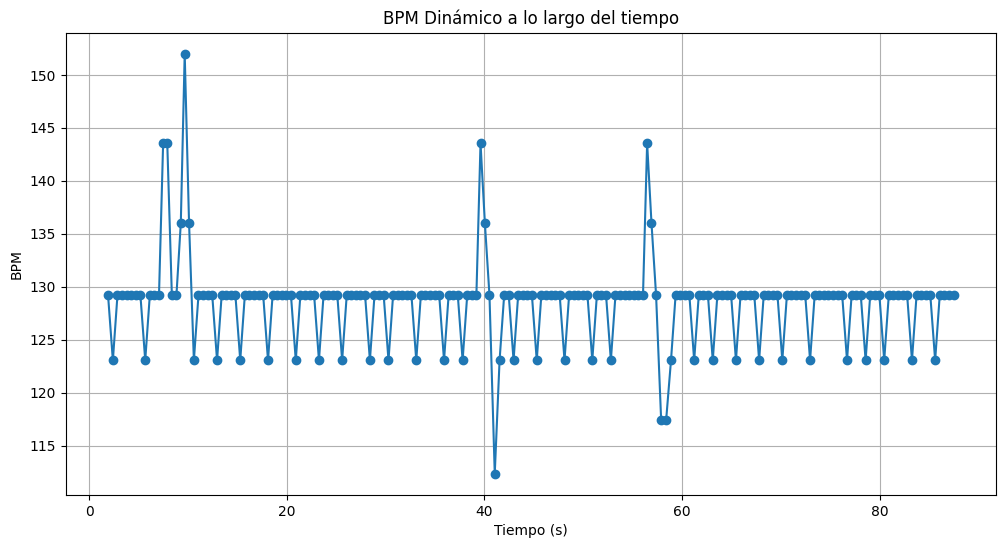

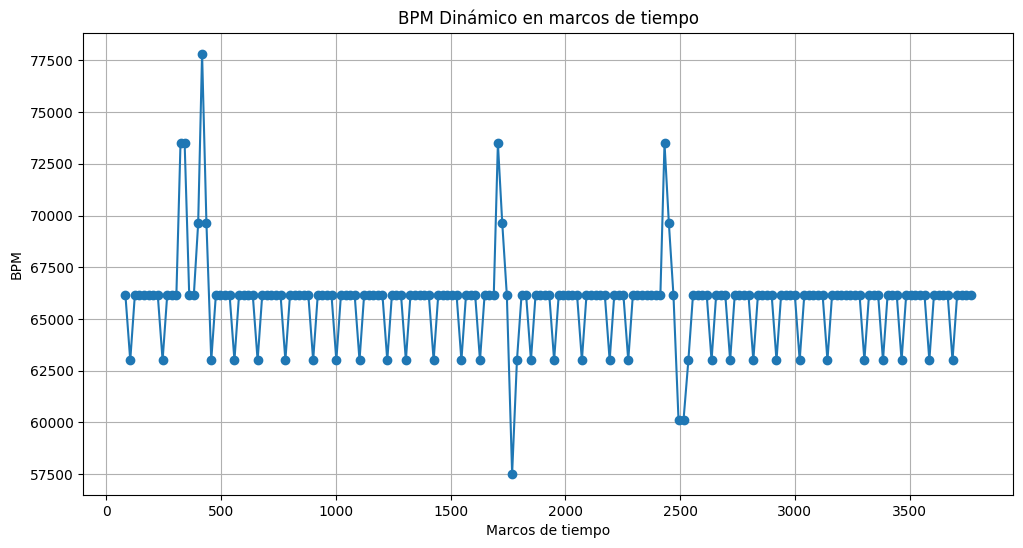

Tiempo: 1.93s, BPM: 129.20
Tiempo: 2.41s, BPM: 123.05
Tiempo: 2.88s, BPM: 129.20
Tiempo: 3.34s, BPM: 129.20
Tiempo: 3.81s, BPM: 129.20
Tiempo: 4.27s, BPM: 129.20
Tiempo: 4.74s, BPM: 129.20
Tiempo: 5.20s, BPM: 129.20
Tiempo: 5.69s, BPM: 123.05
Tiempo: 6.15s, BPM: 129.20
Tiempo: 6.62s, BPM: 129.20
Tiempo: 7.08s, BPM: 129.20
Tiempo: 7.50s, BPM: 143.55
Tiempo: 7.92s, BPM: 143.55
Tiempo: 8.38s, BPM: 129.20
Tiempo: 8.85s, BPM: 129.20
Tiempo: 9.29s, BPM: 136.00
Tiempo: 9.68s, BPM: 152.00
Tiempo: 10.12s, BPM: 136.00
Tiempo: 10.61s, BPM: 123.05
Tiempo: 11.08s, BPM: 129.20
Tiempo: 11.54s, BPM: 129.20
Tiempo: 12.00s, BPM: 129.20
Tiempo: 12.47s, BPM: 129.20
Tiempo: 12.96s, BPM: 123.05
Tiempo: 13.42s, BPM: 129.20
Tiempo: 13.89s, BPM: 129.20
Tiempo: 14.35s, BPM: 129.20
Tiempo: 14.81s, BPM: 129.20
Tiempo: 15.30s, BPM: 123.05
Tiempo: 15.77s, BPM: 129.20
Tiempo: 16.23s, BPM: 129.20
Tiempo: 16.70s, BPM: 129.20
Tiempo: 17.16s, BPM: 129.20
Tiempo: 17.62s, BPM: 129.20
Tiempo: 18.11s, BPM: 123.05
Tiempo: 18

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo de audio
y, sr = librosa.load(sound_filepath)

# Detección de beats usando librosa
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Calcular intervalos entre beats en segundos
beat_intervals = np.diff(beat_times)

# Calcular BPM dinámico para cada intervalo de beat en segundos
bpm_dynamic = 60.0 / beat_intervals

# Crear un gráfico para mostrar el BPM dinámico a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(beat_times[1:], bpm_dynamic, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('BPM')
plt.title('BPM Dinámico a lo largo del tiempo')
plt.grid(True)

plt.show()

# Calcular los intervalos de beats en marcos
beat_frames = np.array(beat_frames)

# Calcular BPM dinámico para cada intervalo de beat en marcos
bpm_dynamic_frames = 60.0 / (np.diff(beat_frames) / sr)

# Crear un gráfico para mostrar el BPM dinámico en marcos
plt.figure(figsize=(12, 6))
plt.plot(beat_frames[1:], bpm_dynamic_frames, marker='o')
plt.xlabel('Marcos de tiempo')
plt.ylabel('BPM')
plt.title('BPM Dinámico en marcos de tiempo')
plt.grid(True)

plt.show()

# Imprimir algunos valores de BPM dinámico
for i, bpm in enumerate(bpm_dynamic):
    print(f'Tiempo: {beat_times[i+1]:.2f}s, BPM: {bpm:.2f}')


In [18]:
len(compases)

47

In [20]:
notes = """
00000
00000
00000
00000
,
00000
00000
00000
00000
,
00000
00000
00000
00000
,
00000
00000
00000
00000
,
00000
00000
00000
00000
,
00100
00000
00000
00000
,
00000
10000
10000
00000
,
00000
00000
00000
00000
,
00000
00001
00001
00000
,
00100
00000
00000
00000
,
00001
00000
00000
00000
,
10000
00000
00000
00000
,
00000
00100
00100
00000
,
01000
00000
00000
00000
,
00000
00010
00010
00000
,
00000
00000
00000
00000
,
00000
01000
01000
00000
,
00010
00000
00000
00000
,
01000
00000
00000
00000
,
00100
00000
00000
00000
,
00000
00100
00100
00000
,
00000
00000
00000
00000
,
10000
00000
00000
00000
,
00001
00000
00000
00000
,
10000
00000
00000
00000
,
00100
00000
00000
00000
,
01000
00000
00000
00000
,
00010
00000
00000
00000
,
01000
00000
00000
00000
,
00100
00000
00000
00000
,
00000
00000
00000
00000
,
20000
00000
30000
00000
,
00000
00000
10001
00000
,
00002
00000
00003
00000
,
00000
00000
10001
00000
,
00001
00000
00000
00000
,
10000
00000
00000
00000
,
00100
00000
00000
00000
,
00000
00000
10001
00000
,
10000
00000
00100
00000
,
01000
00000
00000
00000
,
00010
00000
01000
00000
,
00010
00000
00000
00000
,
01010
00000
00000
00000
,
00100
00000
00000
00000
,
00001
00000
10000
00000
,
00001
00000
00000
10001
;"""

len(notes.split(','))

47